In [1]:
library(data.table)
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(cowplot)
theme_set(theme_cowplot())


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [2]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

In [3]:
    # pheno base/longit
    # N = 4,189
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", header=T)

    # qcd CH variants 
ch_var_in_v05_qcd <- fread("ch_var_in_v05_qcd.23Mar2023.csv", header = T)

ch_var_in_baseline_qcd <- fread("ch_var_in_baseline_qcd.23Mar2023.csv", header = T)

    # pre-qc CH variants 
ch_var_in_baseline <- fread("../Returned_CH_call/baseline_CH_variants_in_aric_hiseq_novaseq_samevisit.maxDP_noDup.plusPileup.2023Jan30.csv", header = T)

ch_var_in_v05 <- fread("../Returned_CH_call/ch_var_in_v05.plusPileup.2023Jan30.csv", header = T)


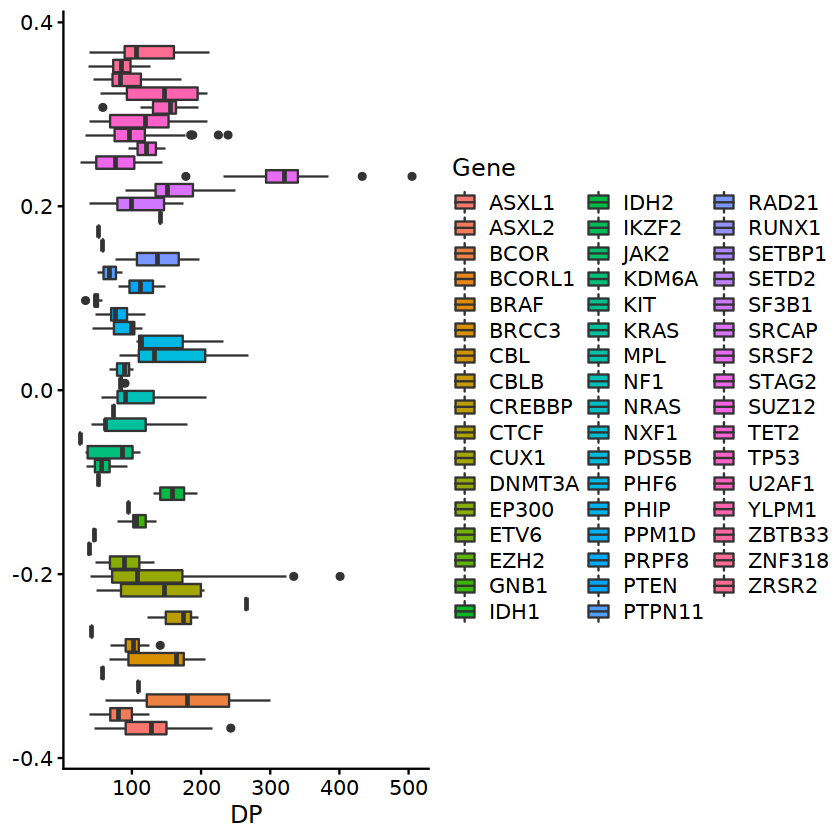

In [4]:
ch_var_in_v05_qcd %>% ggplot(.,aes(x=DP,fill=Gene)) + geom_boxplot()
#boxplot(ch_var_in_baseline_qcd$DP ~ ch_var_in_baseline_qcd$Gene)

In [5]:
## Combine with phenotype data

    # qcd CH variants + all Phenotypes
ch_var_in_v05_qcd.pheno <- merge(ch_var_in_v05_qcd, 
                                 aric_baseline_n_v05, 
                                 by="GWAS_ID")
nrow(ch_var_in_v05_qcd.pheno)
head(ch_var_in_v05_qcd.pheno)

ch_var_in_baseline_qcd.pheno <- merge(ch_var_in_baseline_qcd, 
                                      aric_baseline_n_v05, 
                                      by="GWAS_ID")
nrow(ch_var_in_baseline_qcd.pheno)
head(ch_var_in_baseline_qcd.pheno)

[1] 1302

GWAS_ID,GWASID_Visit.x,cram_id.x,Visit,CHR,POS,REF,ALT,Gene,AD,...,CHvaf10_baseline_v05,CH_DTA,CH_SF,CH_DDR,CH_DNMT3A,CH_TET2,CH_ASXL1,nonHDL_base_std,age_base_sqr,Center
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>
A00004,A00004_V05,H5TH7DSX2-2-IDUDI0072,V05,chr2,25244539,C,A,DNMT3A,"88,44",...,NA,1,NA,NA,1,NA,NA,-0.06472577,2601,M
A00013,A00013_V05,HKNWTDSX2-3-IDUDI0063,V05,chr4,105275783,C,A,TET2,"37,19",...,NA,1,NA,NA,NA,1,NA,-0.07766338,3844,M
A00030,A00030_V05,H25CJDSX3-3-IDUDI0030,V05,chr2,25241616,C,CCG,DNMT3A,"165,7",...,0,0,0,0,0,0,0,-0.12941380,2809,F_J
A00030,A00030_V05,H25CJDSX3-3-IDUDI0030,V05,chr2,25247615,C,T,DNMT3A,"150,12",...,0,0,0,0,0,0,0,-0.12941380,2809,F_J
A00039,A00039_V05,H25CLDSX3-2-IDUDI0002,V05,chrX,44961295,CT,C,KDM6A,"30,3",...,0,0,0,0,0,0,0,-0.18116423,3025,M
A00115,A00115_V05,HK3MMDSX2-1-IDUDI0006,V05,chr20,32435180,T,A,ASXL1,"115,4",...,0,0,0,0,0,0,0,-0.11935122,3969,W


[1] 576

GWAS_ID,cram_id.x,GWASID_Visit.x,Visit,CHR,POS,REF,ALT,Gene,AD,...,CHvaf10_baseline_v05,CH_DTA,CH_SF,CH_DDR,CH_DNMT3A,CH_TET2,CH_ASXL1,nonHDL_base_std,age_base_sqr,Center
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>
A00004,H2VWGDSX5-1-IDUDI0031,A00004_V03,V03,chr2,25244539,C,A,DNMT3A,5,...,NA,1,NA,NA,1,NA,NA,-0.06472577,2601,M
A00013,HY2TVDSX3-4-IDUDI0010,A00013_V02,V02,chr4,105275783,C,A,TET2,3,...,NA,1,NA,NA,NA,1,NA,-0.07766338,3844,M
A00013,A00013,A00013_V02,V02,chr4,105235170,C,CA,TET2,"66,6",...,NA,1,NA,NA,NA,1,NA,-0.07766338,3844,M
A00143,HM73KDSX3-2-IDUDI0014,A00143_V02,V02,chr2,25243931,G,A,DNMT3A,4,...,NA,1,NA,NA,1,NA,NA,-0.07478835,2601,W
A00147,A00147,A00147_V02,V02,chr2,25241587,T,A,DNMT3A,"48,27",...,1,1,NA,NA,1,NA,NA,0.11640073,3721,F_J
A00190,CIPA00190,A00190_V02,V02,chr16,3728173,G,A,CREBBP,"130,4",...,0,NA,NA,NA,NA,NA,NA,-0.07910089,3600,M


In [6]:
table(ch_var_in_baseline_qcd.pheno$Visit)
table(ch_var_in_baseline_qcd.pheno$Visit.x)
table(ch_var_in_baseline_qcd.pheno$Visit.y)


MRI V01 V02 V03 V04 
 10  15 456  89   6 


V05 
576 


MRI V01 V02 V03 V04 
 10  15 456  89   6 

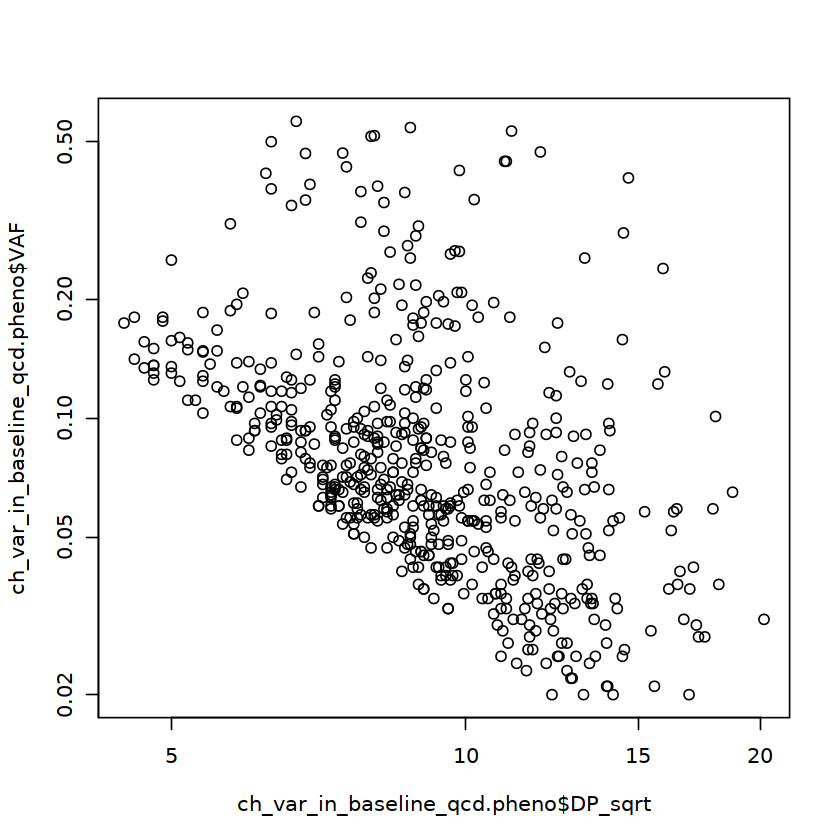

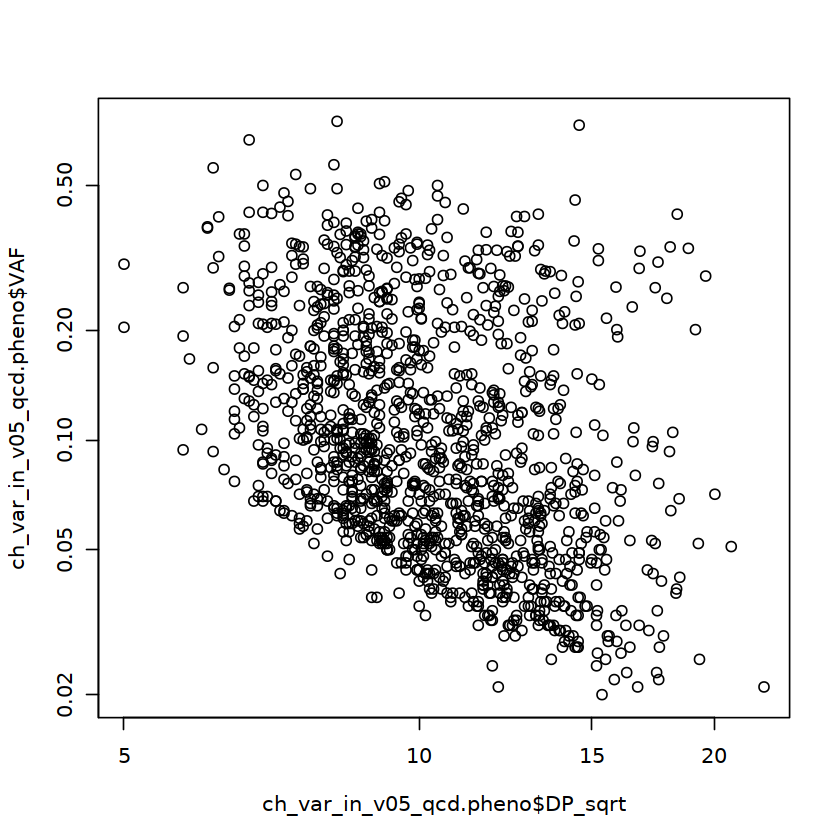

In [20]:
# square-root of DP
ch_var_in_baseline_qcd.pheno$DP_sqrt <- sqrt(ch_var_in_baseline_qcd.pheno$DP)
plot(ch_var_in_baseline_qcd.pheno$DP_sqrt, ch_var_in_baseline_qcd.pheno$VAF, log="xy")
ch_var_in_v05_qcd.pheno$DP_sqrt <- sqrt(ch_var_in_v05_qcd.pheno$DP)
plot(ch_var_in_v05_qcd.pheno$DP_sqrt, ch_var_in_v05_qcd.pheno$VAF, log="xy")

In [12]:
table(ch_var_in_v05_qcd$varID_GWASID[ch_var_in_v05_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_baseline_qcd$varID_GWASID[ch_var_in_baseline_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID]); 
table(ch_var_in_v05_qcd$varID_GWASID[ch_var_in_v05_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_baseline$varID_GWASID[ch_var_in_baseline$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID])


FALSE  TRUE 
 1003   299 


FALSE  TRUE 
  950   352 

In [84]:
# 950 variants with no detected clones in baseline
sort(table(ch_var_in_v05_qcd$Gene[!(ch_var_in_v05_qcd$varID_GWASID[ch_var_in_v05_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_baseline$varID_GWASID[ch_var_in_baseline$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID])]))


  BCOR BCORL1   BRAF   CBLB   CTCF  EP300   ETV6   IDH1  IKZF2    KIT   PHF6 
     1      1      1      1      1      1      1      1      1      1      1 
PTPN11  RAD21  RUNX1  SETD2  SUZ12 CREBBP   CUX1   EZH2   IDH2   NXF1   PTEN 
     1      1      1      1      1      2      2      2      3      3      3 
 U2AF1   GNB1  KDM6A   PHIP  PRPF8   KRAS  ZRSR2  ASXL2    CBL    NF1  BRCC3 
     3      4      4      4      4      5      5      6      7      7      8 
 SRCAP  YLPM1  PDS5B  STAG2   JAK2 ZNF318  SRSF2   TP53 ZBTB33  PPM1D  SF3B1 
     9     10     11     12     14     17     18     21     21     28     30 
 ASXL1   TET2 DNMT3A 
    74    192    410 

In [13]:
table(ch_var_in_baseline_qcd$varID_GWASID[ch_var_in_baseline_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_v05_qcd$varID_GWASID[ch_var_in_v05_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID]) 
table(ch_var_in_baseline_qcd$varID_GWASID[ch_var_in_baseline_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_v05$varID_GWASID[ch_var_in_v05$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID]) 


FALSE  TRUE 
  277   299 


FALSE  TRUE 
  269   307 

In [83]:
sort(table(ch_var_in_baseline_qcd$Gene[!(ch_var_in_baseline_qcd$varID_GWASID[ch_var_in_baseline_qcd$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID] %in% ch_var_in_v05$varID_GWASID[ch_var_in_v05$GWAS_ID %in% aric_baseline_n_v05$GWAS_ID])]))


   EED  GATA1  GATA2   GNB1  IKZF1  IKZF3   KRAS   PTEN PTPN11 SETDB1    WT1 
     1      1      1      1      1      1      1      1      1      1      1 
  CUX1   EZH2    NF1  SRSF2  U2AF1   IDH2   JAK2    KIT  RUNX1  ZRSR2 BCORL1 
     2      2      2      2      2      3      3      3      3      4      5 
  CBLB   NXF1   PHF6  RAD21    CBL  SETD2   BCOR ZBTB33   SMC3  STAG1  SUZ12 
     5      5      5      6      7      7      8      8     10     11     11 
  PHIP  BRCC3  SF3B1  PPM1D  KDM6A  STAG2  SRCAP  EP300  PDS5B ZNF318   TP53 
    13     15     15     16     18     18     19     21     24     24     27 
 YLPM1  ASXL1   TET2 DNMT3A 
    32     47     55    206 

### Trackable clones

In [47]:
#####################
## Expanded/shrinked CH
#####################

  ## Variant observed in  common variants 
ch_var_longitudinal_base_n_v05 <- merge(ch_var_in_v05_qcd.pheno, 
                                        ch_var_in_baseline, 
                                        by="varID_GWASID")

nrow(ch_var_longitudinal_base_n_v05)
summary(ch_var_longitudinal_base_n_v05$VAF.x)
summary(ch_var_longitudinal_base_n_v05$VAF.y)


Warning message in merge.data.table(ch_var_in_v05_qcd.pheno, ch_var_in_baseline, :
"column names 'Visit.x', 'Visit.y' are duplicated in the result"


[1] 352

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02000 0.08075 0.15450 0.18548 0.26400 0.57000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.007   0.044   0.077   0.112   0.131   0.563 

In [48]:
names(ch_var_longitudinal_base_n_v05)

[1] "varID_GWASID"         "GWAS_ID.x"            "GWASID_Visit.x"      
  [4] "cram_id.x"            "Visit.x"              "CHR.x"               
  [7] "POS.x"                "REF.x"                "ALT.x"               
 [10] "Gene.x"               "AD.x"                 "VAF.x"               
 [13] "DP.x"                 "AD.Alt.x"             "FR.Alt.x"            
 [16] "RR.Alt.x"             "Accession.x"          "transcriptOI.x"      
 [19] "NonsynOI.x"           "Func.refGene.x"       "ExonicFunc.refGene.x"
 [22] "AAChange.refGene.x"   "varID.x"              "varID_GWASID_Visit.x"
 [25] "ARIC_ID"              "GWASID_Visit.y"       "cram_id.y"           
 [28] "Visit.x"              "Gender"               "Age"                 
 [31] "CH_baseline"          "CH_v05"               "incident_CH"         
 [34] "incident_CHvaf05"     "incident_CHvaf10"     "incident_DTA"        
 [37] "incident_SF"          "incident_DDR"         "sex_v5"              
 [40] "race_v5"              "center_v5"            "dob_v5"              
 [43] "date_v5"              "age_v5"               "fast_8_v5"           
 [46] "bmi_v5"               "dm_126_v5"            "gluc_v5"             
 [49] "htn_5_v5"             "chol_v5"              "hdl_v5"              
 [52] "ldl_v5"               "tg_v5"                "chol_med_v5"         
 [55] "statin_v5"            "cig_v5"               "chd_v5"              
 [58] "is_v5"                "hs_v5"                "hf_v5"               
 [61] "death.x"              "death_date.x"         "bmi_v5_std"          
 [64] "gluc_v5_std"          "chol_v5_std"          "hdl_v5_std"          
 [67] "ldl_v5_std"           "tg_v5_std"            "non_hdl_v5_std"      
 [70] "hg38_CRAM_ID"         "aricid"               "Visit.y"             
 [73] "sex"                  "race"                 "center"              
 [76] "dob"                  "date_base"            "age_base"            
 [79] "fast_8_base"          "bmi_base"             "dm_126_base"         
 [82] "gluc_base"            "htn_5_base"           "chol_base"           
 [85] "hdl_base"             "ldl_base"             "tg_base"             
 [88] "chol_med_base"        "statin_base"          "cig_base"            
 [91] "chd_date"             "is_date"              "hs_date"             
 [94] "hf_date"              "death.y"              "death_date.y"        
 [97] "lfu_date"             "chd_base"             "is_base"             
[100] "hs_base"              "hf_base"              "ever_smoke"          
[103] "v2_vs_other"          "Sex"                  "race_BW"             
[106] "BMI_cat"              "nonHDL_std"           "hdl_base_std"        
[109] "ldl_base_std"         "chol_base_std"        "tg_base_std"         
[112] "gluc_base_std"        "bmi_base_std"         "CHvaf10_baseline"    
[115] "CH_baseline_v05"      "CHvaf10_baseline_v05" "CH_DTA"              
[118] "CH_SF"                "CH_DDR"               "CH_DNMT3A"           
[121] "CH_TET2"              "CH_ASXL1"             "Center"              
[124] "nonHDL_base_std"      "age_base_sqr"         "DP_sqrt"             
[127] "cram_id"              "GWASID_Visit"         "GWAS_ID.y"           
[130] "Visit.y"              "CHR.y"                "POS.y"               
[133] "REF.y"                "ALT.y"                "Gene.y"              
[136] "AD.y"                 "VAF.y"                "DP.y"                
[139] "AD.Alt.y"             "FR.Alt.y"             "RR.Alt.y"            
[142] "Accession.y"          "transcriptOI.y"       "NonsynOI.y"          
[145] "Func.refGene.y"       "ExonicFunc.refGene.y" "AAChange.refGene.y"  
[148] "Batch"                "varID.y"              "varID_GWASID_Visit.y"

In [49]:
ch_var_longitudinal_base_n_v05$DP_b_sqrt <- sqrt(ch_var_longitudinal_base_n_v05$DP.y)
summary(ch_var_longitudinal_base_n_v05$DP_sqrt)
summary(ch_var_longitudinal_base_n_v05$DP_b_sqrt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.083   8.485   9.823  10.421  11.979  18.276 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.583   8.047   9.192  10.017  11.937  20.174 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.047945  0.003814  0.040130  0.076895  0.106749  1.159664 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.059470  0.003675  0.029157  0.032412  0.056525  0.197490 

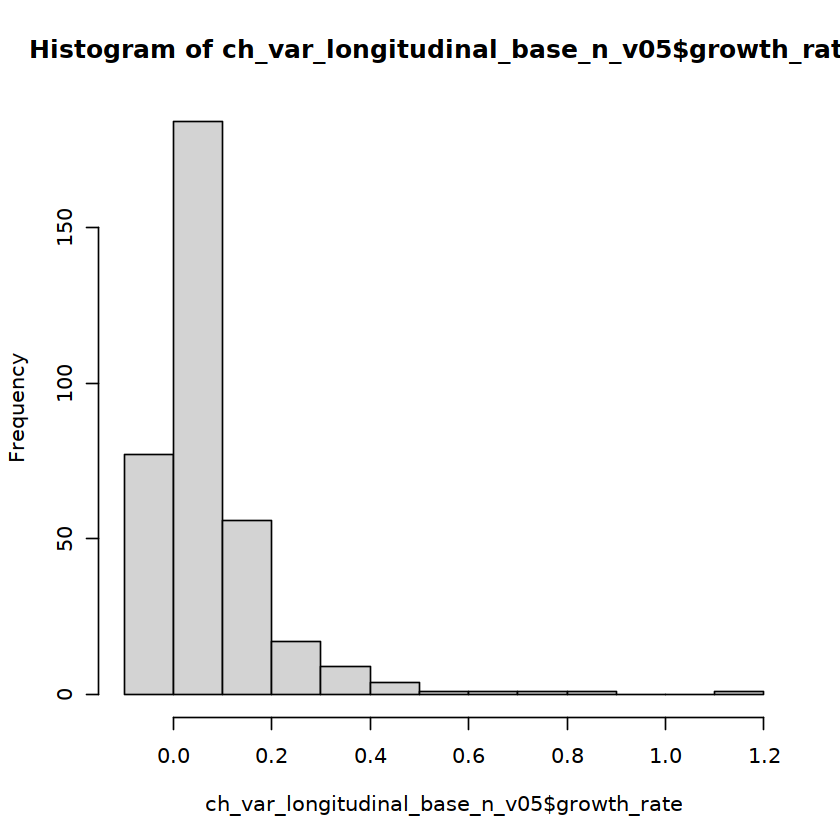

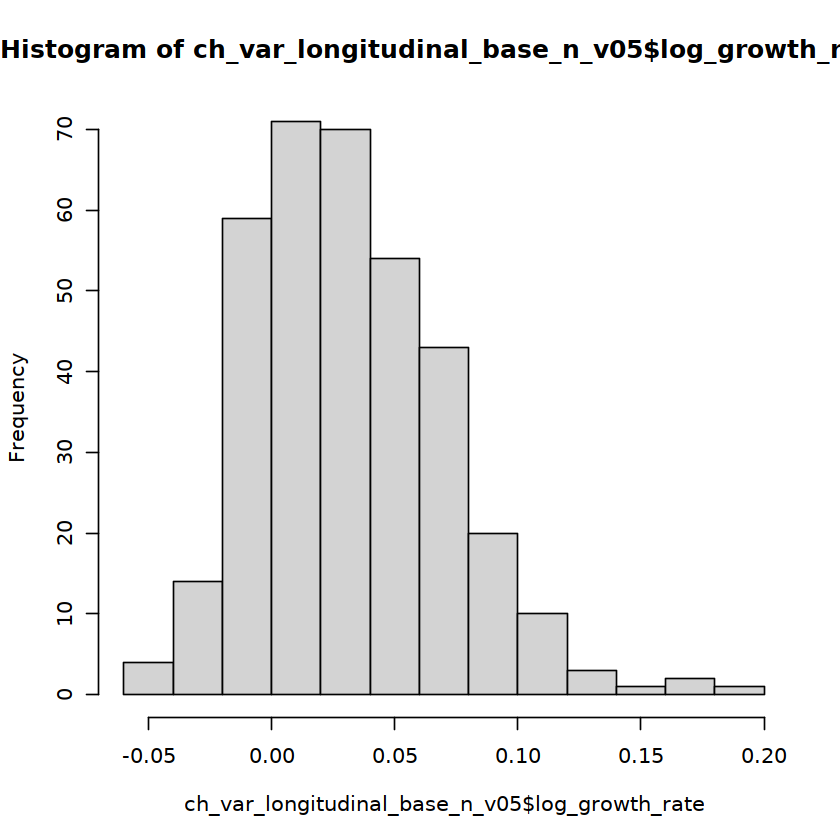

In [56]:
ch_var_longitudinal_base_n_v05$dAge <- (ch_var_longitudinal_base_n_v05$Age - ch_var_longitudinal_base_n_v05$age_base)

ch_var_longitudinal_base_n_v05$dVAF <- (ch_var_longitudinal_base_n_v05$VAF.x - ch_var_longitudinal_base_n_v05$VAF.y)

ch_var_longitudinal_base_n_v05$pctVAF <- (ch_var_longitudinal_base_n_v05$VAF.x/ch_var_longitudinal_base_n_v05$VAF.y - 1)

ch_var_longitudinal_base_n_v05$growth_rate <- (ch_var_longitudinal_base_n_v05$pctVAF/ch_var_longitudinal_base_n_v05$dAge)

ch_var_longitudinal_base_n_v05$log_growth_rate <- (log(ch_var_longitudinal_base_n_v05$VAF.x/ch_var_longitudinal_base_n_v05$VAF.y)/ch_var_longitudinal_base_n_v05$dAge)

summary(ch_var_longitudinal_base_n_v05$growth_rate)
hist(ch_var_longitudinal_base_n_v05$growth_rate)

summary(ch_var_longitudinal_base_n_v05$log_growth_rate)
hist(ch_var_longitudinal_base_n_v05$log_growth_rate)


In [57]:
head(ch_var_longitudinal_base_n_v05)


varID_GWASID,GWAS_ID.x,GWASID_Visit.x,cram_id.x,Visit.x,CHR.x,POS.x,REF.x,ALT.x,Gene.x,...,AAChange.refGene.y,Batch,varID.y,varID_GWASID_Visit.y,DP_b_sqrt,dAge,dVAF,pctVAF,log_growth_rate,growth_rate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
chr10_87931087_GAGGT_G_A07861,A07861,A07861_V05,HW2Y3DSX2-3-IDUDI0050,V05,chr10,87931087,GAGGT,G,PTEN,...,"PTEN:NM_000314:exon4:c.252_253del:p.R84Sfs*7,PTEN:NM_001304717:exon5:c.771_772del:p.R257Sfs*7",Hiseq,chr10_87931087_GAGGT_G,chr10_87931087_GAGGT_G_A07861_V02,10.198039,22,0.092,0.2577031,0.010422141,0.011713776
chr11_119278263_A_C_A12375,A12375,A12375_V05,H257KDSX3-3-IDUDI0021,V05,chr11,119278263,A,C,CBL,...,CBL:NM_005188:exon8:c.A1193C:p.H398P,Hiseq,chr11_119278263_A_C,chr11_119278263_A_C_A12375_V02,9.848858,20,0.033,0.1250000,0.005889152,0.006250000
chr12_112477719_A_G_A10705,A10705,A10705_V05,HHVJJDSX3-1-IDUDI0027,V05,chr12,112477719,A,G,PTPN11,...,"PTPN11:NM_001330437:exon8:c.A922G:p.N308D,PTPN11:NM_002834:exon8:c.A922G:p.N308D,PTPN11:NM_080601:exon8:c.A922G:p.N308D",Hiseq,chr12_112477719_A_G,chr12_112477719_A_G_A10705_V02,8.660254,21,0.207,3.9056604,0.075732844,0.185983827
chr13_32758127_G_T_A05698,A05698,A05698_V05,HVMHTDSXY-2-IDUDI0068,V05,chr13,32758127,G,T,PDS5B,...,PDS5B:NM_015032:exon27:c.G3097T:p.E1033X,NovaSeq Run2,chr13_32758127_G_T,chr13_32758127_G_T_A05698_V02,9.273618,20,0.029,0.8285714,0.030176751,0.041428571
chr14_74778450_C_T_A13030,A13030,A13030_V05,HNTCYDSX2-1-IDUDI0026,V05,chr14,74778450,C,T,YLPM1,...,YLPM1:NM_019589:exon2:c.C877T:p.Q293X,Hiseq,chr14_74778450_C_T,chr14_74778450_C_T_A13030_V01,8.888194,24,0.042,0.3716814,0.013168221,0.015486726
chr14_74797725_G_T_A15238,A15238,A15238_V05,H7YNLDSX2-2-IDUDI0045,V05,chr14,74797725,G,T,YLPM1,...,YLPM1:NM_019589:exon5:c.G2428T:p.G810X,Hiseq,chr14_74797725_G_T,chr14_74797725_G_T_A15238_V02,7.681146,20,-0.008,-0.1568627,-0.008531276,-0.007843137


In [70]:
names(ch_var_longitudinal_base_n_v05[,c(1,10,151:156)])

[1] "varID_GWASID"    "Gene.x"          "DP_b_sqrt"       "dAge"           
[5] "dVAF"            "pctVAF"          "log_growth_rate" "growth_rate"

In [72]:
sort(table(ch_var_longitudinal_base_n_v05$Gene.x))


 ASXL2 BCORL1    CBL   IDH2  IKZF2  KDM6A  PDS5B   PHIP   PTEN PTPN11  SUZ12 
     1      1      1      1      1      1      1      1      1      1      1 
  JAK2  SF3B1  SRSF2  STAG2  U2AF1  YLPM1   GNB1    NF1  BRCC3  SRCAP ZBTB33 
     2      2      2      2      2      2      3      3      4      4      4 
  TP53  PPM1D ZNF318  ASXL1   TET2 DNMT3A 
     5      6     13     28     57    202 

In [85]:
## Gene Gropu: D, T, A, DDR, SF, Other
ch_var_longitudinal_base_n_v05$Gene_Group <- ifelse(ch_var_longitudinal_base_n_v05$Gene.x=="DNMT3A", "DNMT3A",ifelse(ch_var_longitudinal_base_n_v05$Gene.x=="TET2", "TET2",ifelse(ch_var_longitudinal_base_n_v05$Gene.x=="ASXL1", "ASXL1",ifelse(ch_var_longitudinal_base_n_v05$Gene.x %in% c("PPM1D", "TP53"), "DDR", ifelse(ch_var_longitudinal_base_n_v05$Gene.x %in% c("SF3B1", "SRSF2","U2AF1", "ZRSR2"), "SF","Other")))))
table(ch_var_longitudinal_base_n_v05$Gene_Group)


 ASXL1    DDR DNMT3A  Other     SF   TET2 
    28     11    202     48      6     57 

In [77]:
names(ch_var_longitudinal_base_n_v05)

[1] "varID_GWASID"         "GWAS_ID.x"            "GWASID_Visit.x"      
  [4] "cram_id.x"            "Visit.x"              "CHR.x"               
  [7] "POS.x"                "REF.x"                "ALT.x"               
 [10] "Gene.x"               "AD.x"                 "VAF.x"               
 [13] "DP.x"                 "AD.Alt.x"             "FR.Alt.x"            
 [16] "RR.Alt.x"             "Accession.x"          "transcriptOI.x"      
 [19] "NonsynOI.x"           "Func.refGene.x"       "ExonicFunc.refGene.x"
 [22] "AAChange.refGene.x"   "varID.x"              "varID_GWASID_Visit.x"
 [25] "ARIC_ID"              "GWASID_Visit.y"       "cram_id.y"           
 [28] "Visit.x"              "Gender"               "Age"                 
 [31] "CH_baseline"          "CH_v05"               "incident_CH"         
 [34] "incident_CHvaf05"     "incident_CHvaf10"     "incident_DTA"        
 [37] "incident_SF"          "incident_DDR"         "sex_v5"              
 [40] "race_v5"              "center_v5"            "dob_v5"              
 [43] "date_v5"              "age_v5"               "fast_8_v5"           
 [46] "bmi_v5"               "dm_126_v5"            "gluc_v5"             
 [49] "htn_5_v5"             "chol_v5"              "hdl_v5"              
 [52] "ldl_v5"               "tg_v5"                "chol_med_v5"         
 [55] "statin_v5"            "cig_v5"               "chd_v5"              
 [58] "is_v5"                "hs_v5"                "hf_v5"               
 [61] "death.x"              "death_date.x"         "bmi_v5_std"          
 [64] "gluc_v5_std"          "chol_v5_std"          "hdl_v5_std"          
 [67] "ldl_v5_std"           "tg_v5_std"            "non_hdl_v5_std"      
 [70] "hg38_CRAM_ID"         "aricid"               "Visit.y"             
 [73] "sex"                  "race"                 "center"              
 [76] "dob"                  "date_base"            "age_base"            
 [79] "fast_8_base"          "bmi_base"             "dm_126_base"         
 [82] "gluc_base"            "htn_5_base"           "chol_base"           
 [85] "hdl_base"             "ldl_base"             "tg_base"             
 [88] "chol_med_base"        "statin_base"          "cig_base"            
 [91] "chd_date"             "is_date"              "hs_date"             
 [94] "hf_date"              "death.y"              "death_date.y"        
 [97] "lfu_date"             "chd_base"             "is_base"             
[100] "hs_base"              "hf_base"              "ever_smoke"          
[103] "v2_vs_other"          "Sex"                  "race_BW"             
[106] "BMI_cat"              "nonHDL_std"           "hdl_base_std"        
[109] "ldl_base_std"         "chol_base_std"        "tg_base_std"         
[112] "gluc_base_std"        "bmi_base_std"         "CHvaf10_baseline"    
[115] "CH_baseline_v05"      "CHvaf10_baseline_v05" "CH_DTA"              
[118] "CH_SF"                "CH_DDR"               "CH_DNMT3A"           
[121] "CH_TET2"              "CH_ASXL1"             "Center"              
[124] "nonHDL_base_std"      "age_base_sqr"         "DP_sqrt"             
[127] "cram_id"              "GWASID_Visit"         "GWAS_ID.y"           
[130] "Visit.y"              "CHR.y"                "POS.y"               
[133] "REF.y"                "ALT.y"                "Gene.y"              
[136] "AD.y"                 "VAF.y"                "DP.y"                
[139] "AD.Alt.y"             "FR.Alt.y"             "RR.Alt.y"            
[142] "Accession.y"          "transcriptOI.y"       "NonsynOI.y"          
[145] "Func.refGene.y"       "ExonicFunc.refGene.y" "AAChange.refGene.y"  
[148] "Batch"                "varID.y"              "varID_GWASID_Visit.y"
[151] "DP_b_sqrt"            "dAge"                 "dVAF"                
[154] "pctVAF"               "log_growth_rate"      "growth_rate"

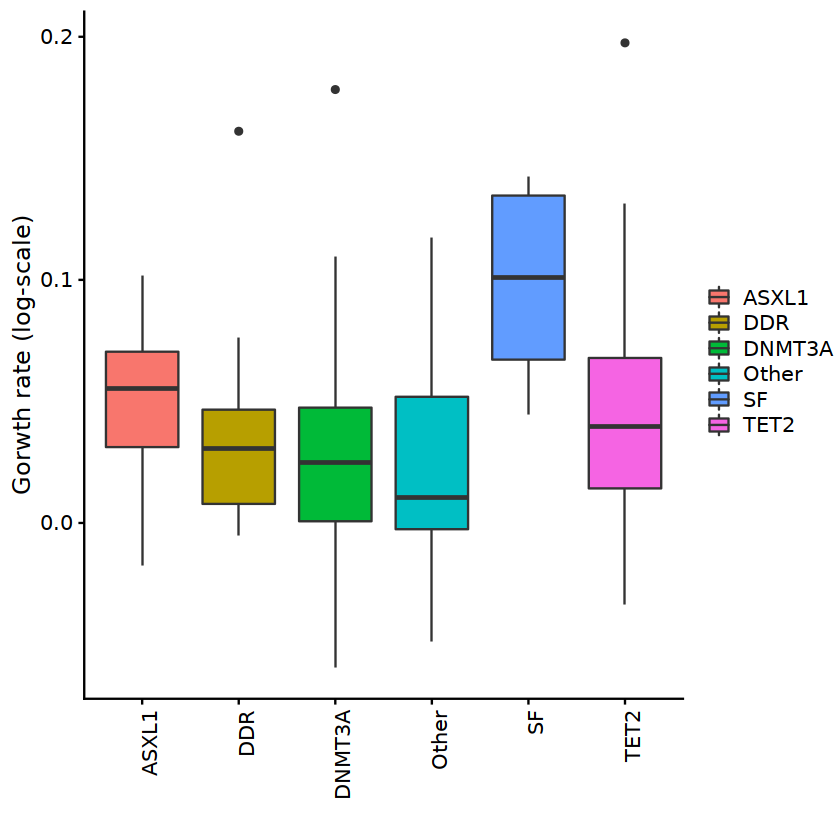

In [86]:
ch_var_longitudinal_base_n_v05[,c(1,10,151:157)] %>% ggplot(data=., aes(x=Gene_Group, y=log_growth_rate)) +
  xlab("") + ylab("Gorwth rate (log-scale)") +
  geom_boxplot(aes(fill=Gene_Group)) + theme(axis.text.x = element_text(angle = 90, vjust = 1,  hjust=1),
        legend.title = element_blank(), legend.position = "right")
 

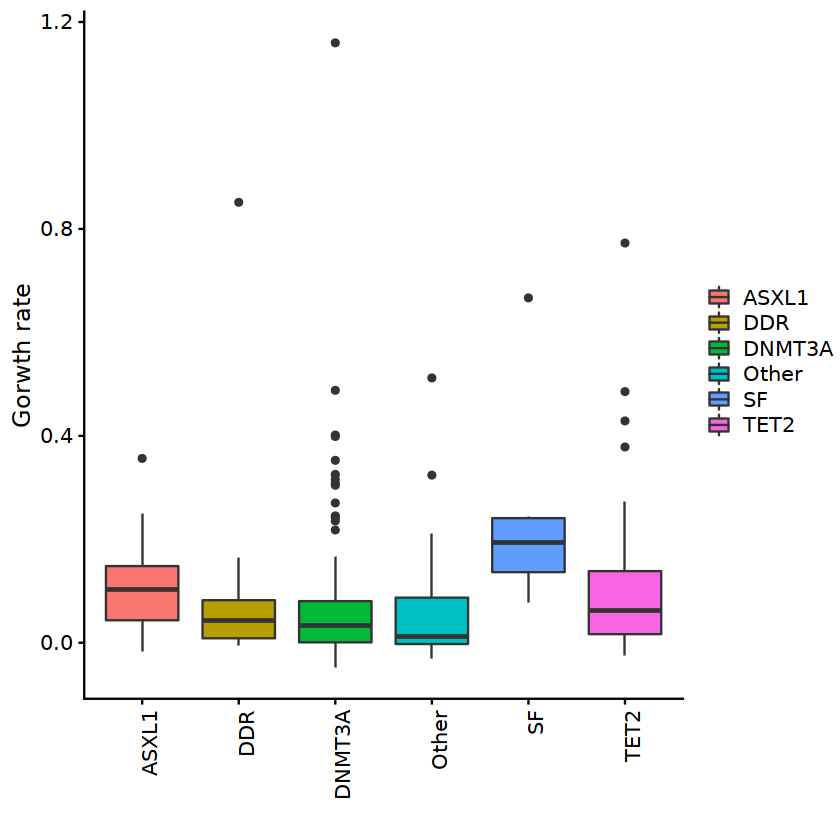

In [88]:
ch_var_longitudinal_base_n_v05[,c(1,10,151:157)] %>% ggplot(data=., aes(x=Gene_Group, y=growth_rate)) +
  xlab("") + ylab("Gorwth rate") +
  geom_boxplot(aes(fill=Gene_Group)) + theme(axis.text.x = element_text(angle = 90, vjust = 1,  hjust=1),
        legend.title = element_blank(), legend.position = "right")

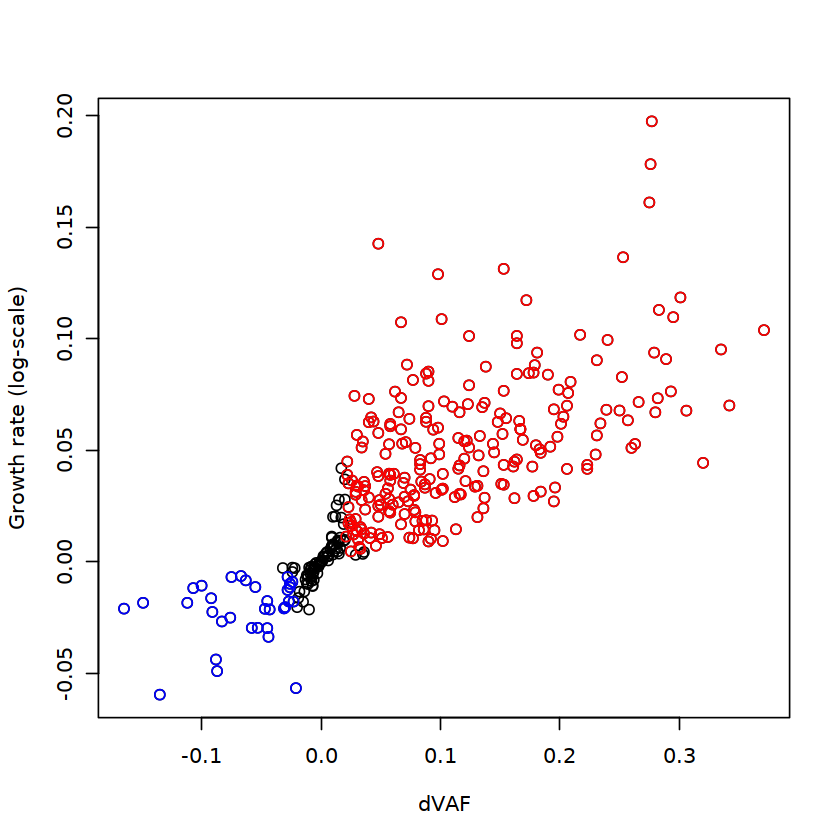

In [87]:
  # expanded = log_growth_rate>0 & dVAF>=0.02 and pctVAF>= 10% 
  # shrinking = log_growth_rate<0 & dVAF<= -0.02 & pctVAF<= -10% 
plot(ch_var_longitudinal_base_n_v05$dVAF, ch_var_longitudinal_base_n_v05$log_growth_rate, xlab = "dVAF", ylab = "Growth rate (log-scale)")
points(ch_var_longitudinal_base_n_v05$dVAF[ch_var_longitudinal_base_n_v05$log_growth_rate>0 & ch_var_longitudinal_base_n_v05$pctVAF>=.1 & ch_var_longitudinal_base_n_v05$dVAF>=0.02], ch_var_longitudinal_base_n_v05$log_growth_rate[ch_var_longitudinal_base_n_v05$log_growth_rate>0 & ch_var_longitudinal_base_n_v05$pctVAF>=.1 & ch_var_longitudinal_base_n_v05$dVAF>=0.02], col="red")
points(ch_var_longitudinal_base_n_v05$dVAF[ch_var_longitudinal_base_n_v05$log_growth_rate<0 & ch_var_longitudinal_base_n_v05$pctVAF<=-.1 & ch_var_longitudinal_base_n_v05$dVAF<=-0.02], ch_var_longitudinal_base_n_v05$log_growth_rate[ch_var_longitudinal_base_n_v05$log_growth_rate<0 & ch_var_longitudinal_base_n_v05$pctVAF<=-.1 & ch_var_longitudinal_base_n_v05$dVAF<=-0.02], col="blue")



In [93]:
table(ch_var_longitudinal_base_n_v05$log_growth_rate>0 & 
                                               ch_var_longitudinal_base_n_v05$pctVAF>=0.1 & 
                                               ch_var_longitudinal_base_n_v05$dVAF>=0.02, exclude=NULL)

table(ch_var_longitudinal_base_n_v05$log_growth_rate<0 & 
                                               ch_var_longitudinal_base_n_v05$pctVAF<= -0.1 & 
                                               ch_var_longitudinal_base_n_v05$dVAF<= -0.02, exclude=NULL)


FALSE  TRUE 
  119   233 


FALSE  TRUE 
  319    33 

In [92]:
ch_var_longitudinal_base_n_v05$trajectory <- ifelse(ch_var_longitudinal_base_n_v05$log_growth_rate>0 & 
                                               ch_var_longitudinal_base_n_v05$pctVAF>=0.1 & 
                                               ch_var_longitudinal_base_n_v05$dVAF>=0.02, "growing",ifelse(ch_var_longitudinal_base_n_v05$log_growth_rate<0 & 
                                               ch_var_longitudinal_base_n_v05$pctVAF<= -0.1 & 
                                               ch_var_longitudinal_base_n_v05$dVAF<= -0.02, "shrinking", "static"))

table(ch_var_longitudinal_base_n_v05$trajectory , exclude = NULL)


  growing shrinking    static 
      233        33        86 

In [96]:
names(ch_var_longitudinal_base_n_v05)

[1] "varID_GWASID"         "GWAS_ID.x"            "GWASID_Visit.x"      
  [4] "cram_id.x"            "Visit.x"              "CHR.x"               
  [7] "POS.x"                "REF.x"                "ALT.x"               
 [10] "Gene.x"               "AD.x"                 "VAF.x"               
 [13] "DP.x"                 "AD.Alt.x"             "FR.Alt.x"            
 [16] "RR.Alt.x"             "Accession.x"          "transcriptOI.x"      
 [19] "NonsynOI.x"           "Func.refGene.x"       "ExonicFunc.refGene.x"
 [22] "AAChange.refGene.x"   "varID.x"              "varID_GWASID_Visit.x"
 [25] "ARIC_ID"              "GWASID_Visit.y"       "cram_id.y"           
 [28] "Visit.x"              "Gender"               "Age"                 
 [31] "CH_baseline"          "CH_v05"               "incident_CH"         
 [34] "incident_CHvaf05"     "incident_CHvaf10"     "incident_DTA"        
 [37] "incident_SF"          "incident_DDR"         "sex_v5"              
 [40] "race_v5"              "center_v5"            "dob_v5"              
 [43] "date_v5"              "age_v5"               "fast_8_v5"           
 [46] "bmi_v5"               "dm_126_v5"            "gluc_v5"             
 [49] "htn_5_v5"             "chol_v5"              "hdl_v5"              
 [52] "ldl_v5"               "tg_v5"                "chol_med_v5"         
 [55] "statin_v5"            "cig_v5"               "chd_v5"              
 [58] "is_v5"                "hs_v5"                "hf_v5"               
 [61] "death.x"              "death_date.x"         "bmi_v5_std"          
 [64] "gluc_v5_std"          "chol_v5_std"          "hdl_v5_std"          
 [67] "ldl_v5_std"           "tg_v5_std"            "non_hdl_v5_std"      
 [70] "hg38_CRAM_ID"         "aricid"               "Visit.y"             
 [73] "sex"                  "race"                 "center"              
 [76] "dob"                  "date_base"            "age_base"            
 [79] "fast_8_base"          "bmi_base"             "dm_126_base"         
 [82] "gluc_base"            "htn_5_base"           "chol_base"           
 [85] "hdl_base"             "ldl_base"             "tg_base"             
 [88] "chol_med_base"        "statin_base"          "cig_base"            
 [91] "chd_date"             "is_date"              "hs_date"             
 [94] "hf_date"              "death.y"              "death_date.y"        
 [97] "lfu_date"             "chd_base"             "is_base"             
[100] "hs_base"              "hf_base"              "ever_smoke"          
[103] "v2_vs_other"          "Sex"                  "race_BW"             
[106] "BMI_cat"              "nonHDL_std"           "hdl_base_std"        
[109] "ldl_base_std"         "chol_base_std"        "tg_base_std"         
[112] "gluc_base_std"        "bmi_base_std"         "CHvaf10_baseline"    
[115] "CH_baseline_v05"      "CHvaf10_baseline_v05" "CH_DTA"              
[118] "CH_SF"                "CH_DDR"               "CH_DNMT3A"           
[121] "CH_TET2"              "CH_ASXL1"             "Center"              
[124] "nonHDL_base_std"      "age_base_sqr"         "DP_sqrt"             
[127] "cram_id"              "GWASID_Visit"         "GWAS_ID.y"           
[130] "Visit.y"              "CHR.y"                "POS.y"               
[133] "REF.y"                "ALT.y"                "Gene.y"              
[136] "AD.y"                 "VAF.y"                "DP.y"                
[139] "AD.Alt.y"             "FR.Alt.y"             "RR.Alt.y"            
[142] "Accession.y"          "transcriptOI.y"       "NonsynOI.y"          
[145] "Func.refGene.y"       "ExonicFunc.refGene.y" "AAChange.refGene.y"  
[148] "Batch"                "varID.y"              "varID_GWASID_Visit.y"
[151] "DP_b_sqrt"            "dAge"                 "dVAF"                
[154] "pctVAF"               "log_growth_rate"      "growth_rate"         
[157] "Gene_Group"           "trajectory"

In [131]:
summary(lm(log_growth_rate ~ age_base + age_base_sqr + Gene_Group + Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + hdl_base_std + ever_smoke + DP_sqrt +  Center + v2_vs_other, data = ch_var_longitudinal_base_n_v05))


Call:
lm(formula = log_growth_rate ~ age_base + age_base_sqr + Gene_Group + 
    Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + 
    hdl_base_std + ever_smoke + DP_sqrt + Center + v2_vs_other, 
    data = ch_var_longitudinal_base_n_v05)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084011 -0.026032 -0.003603  0.023193  0.142405 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       2.221e-01  1.528e-01   1.454  0.14700   
age_base         -6.189e-03  5.284e-03  -1.171  0.24239   
age_base_sqr      5.576e-05  4.546e-05   1.227  0.22082   
Gene_GroupDDR    -1.288e-02  1.313e-02  -0.980  0.32766   
Gene_GroupDNMT3A -1.907e-02  7.496e-03  -2.543  0.01144 * 
Gene_GroupOther  -2.526e-02  8.821e-03  -2.864  0.00445 **
Gene_GroupSF      4.306e-02  1.720e-02   2.503  0.01279 * 
Gene_GroupTET2   -3.199e-03  8.589e-03  -0.372  0.70982   
SexM              3.271e-03  4.279e-03   0.764  0.44516   
race_BWW         -3.269e-03  6

In [103]:
ch_var_longitudinal_base_n_v05$Gene_Group_fact <- factor(x = ch_var_longitudinal_base_n_v05$Gene_Group, levels = c("DNMT3A", "TET2", "ASXL1", "SF", "DDR", "Other"))

In [132]:
summary(lm(log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact + Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + hdl_base_std + ever_smoke + DP_sqrt +  Center + v2_vs_other, data = ch_var_longitudinal_base_n_v05))


Call:
lm(formula = log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact + 
    Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + 
    hdl_base_std + ever_smoke + DP_sqrt + Center + v2_vs_other, 
    data = ch_var_longitudinal_base_n_v05)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084011 -0.026032 -0.003603  0.023193  0.142405 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.030e-01  1.526e-01   1.331 0.184149    
age_base             -6.189e-03  5.284e-03  -1.171 0.242391    
age_base_sqr          5.576e-05  4.546e-05   1.227 0.220823    
Gene_Group_factTET2   1.587e-02  5.710e-03   2.779 0.005768 ** 
Gene_Group_factASXL1  1.907e-02  7.496e-03   2.543 0.011435 *  
Gene_Group_factSF     6.212e-02  1.597e-02   3.889 0.000122 ***
Gene_Group_factDDR    6.190e-03  1.153e-02   0.537 0.591701    
Gene_Group_factOther -6.199e-03  6.027e-03  -1.029 0.304458    
SexM                  3.271e-03  4.279e

In [133]:
## No duplicate
summary(ch_var_longitudinal_base_n_v05[!duplicated(ch_var_longitudinal_base_n_v05$GWAS_ID.x),] %>% lm(log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact + Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + hdl_base_std + ever_smoke + DP_sqrt +  Center + v2_vs_other, data = .))


Call:
lm(formula = log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact + 
    Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + 
    hdl_base_std + ever_smoke + DP_sqrt + Center + v2_vs_other, 
    data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085139 -0.027863 -0.003502  0.024173  0.140616 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           1.702e-01  1.604e-01   1.061  0.28946   
age_base             -5.062e-03  5.567e-03  -0.909  0.36398   
age_base_sqr          4.608e-05  4.791e-05   0.962  0.33698   
Gene_Group_factTET2   1.560e-02  6.343e-03   2.459  0.01450 * 
Gene_Group_factASXL1  1.861e-02  7.850e-03   2.371  0.01835 * 
Gene_Group_factSF     5.568e-02  1.759e-02   3.165  0.00171 **
Gene_Group_factDDR    6.386e-03  1.184e-02   0.539  0.59008   
Gene_Group_factOther -3.776e-03  6.532e-03  -0.578  0.56365   
SexM                  3.411e-03  4.537e-03   0.752  0.45273   
race_BWW      

In [106]:
(summary(ch_var_longitudinal_base_n_v05$growth_rate[ch_var_longitudinal_base_n_v05$Gene_Group=="SF"]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07729 0.13644 0.19417 0.25099 0.24086 0.66667 

In [126]:
# 
# detach("package:lme4", unload=TRUE)

In [127]:
# library(lme4)
# lmerTest and pbkrtest provide P-values of the estimate
library(lmerTest)
fit <- lmer(log_growth_rate ~ age_base + 
            Gene_Group_fact + Sex + race_BW + bmi_base_std + 
            tg_base_std + ever_smoke + DP_sqrt +  Center + v2_vs_other + (1|GWAS_ID.x), 
            data=ch_var_longitudinal_base_n_v05)

summary(fit)


Loading required package: lme4


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step



Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_growth_rate ~ age_base + Gene_Group_fact + Sex + race_BW +  
    bmi_base_std + tg_base_std + ever_smoke + DP_sqrt + Center +  
    v2_vs_other + (1 | GWAS_ID.x)
   Data: ch_var_longitudinal_base_n_v05

REML criterion at convergence: -1193

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3380 -0.6744 -0.1125  0.5709  3.7278 

Random effects:
 Groups    Name        Variance  Std.Dev.
 GWAS_ID.x (Intercept) 0.0001634 0.01278 
 Residual              0.0011829 0.03439 
Number of obs: 352, groups:  GWAS_ID.x, 321

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           1.696e-02  2.390e-02  3.016e+02   0.710  0.47843    
age_base              2.498e-04  3.531e-04  2.893e+02   0.707  0.47990    
Gene_Group_factTET2   1.728e-02  5.679e-03  3.358e+02   3.043  0.00253 ** 
Gene_Group_factASXL1  1.967e-02  7.512e-03  3.301e+02   

In [135]:
summary(lmer(log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact + Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + hdl_base_std + ever_smoke + DP_sqrt +  Center + v2_vs_other + (1|GWAS_ID.x), data=ch_var_longitudinal_base_n_v05))


Correlation matrix not shown by default, as p = 19 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_growth_rate ~ age_base + age_base_sqr + Gene_Group_fact +  
    Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std +  
    hdl_base_std + ever_smoke + DP_sqrt + Center + v2_vs_other +  
    (1 | GWAS_ID.x)
   Data: ch_var_longitudinal_base_n_v05

REML criterion at convergence: -1155.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2319 -0.6779 -0.0850  0.6097  3.7370 

Random effects:
 Groups    Name        Variance  Std.Dev.
 GWAS_ID.x (Intercept) 0.0001027 0.01013 
 Residual              0.0012342 0.03513 
Number of obs: 350, groups:  GWAS_ID.x, 319

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           1.989e-01  1.532e-01  3.013e+02   1.298  0.19520    
age_base             -6.038e-03  5.308e-03  2.986e+02  -1.137  0.25625    
age_base_sqr          5.449e-05  4.567e-05  2.978e+02   1.193  0.23377    
Gen

In [120]:
# car::Anova(fit, type="III")

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
(Intercept),5.036949e-01,1,4.778811e-01
age_base,5.003835e-01,1,4.793317e-01
Gene_Group_fact,3.379920e+01,5,2.610512e-06
Sex,1.140658e+00,1,2.855133e-01
race_BW,1.516426e-01,1,6.969705e-01
bmi_base_std,3.911744e-02,1,8.432162e-01
tg_base_std,1.340934e-01,1,7.142250e-01
ever_smoke,4.959620e-05,1,9.943810e-01
DP_sqrt,1.251635e-03,1,9.717780e-01


In [94]:
  # "growing"; "shrinking"; "NA"
# aric_baseline_n_v05$trajectories <- ifelse(aric_baseline_n_v05$GWAS_ID %in% 
  #                                         ch_var_longitudinal_base_n_v05$GWAS_ID.x[
   #                                            ch_var_longitudinal_base_n_v05$trajectory=="growing"],
    #                                       "growing", 
     #                                      ifelse(aric_baseline_n_v05$GWAS_ID %in% ch_var_longitudinal_base_n_v05$GWAS_ID.x[
      #                                         ch_var_longitudinal_base_n_v05$trajectory=="shrinking"], 
       #                                           "shrinking",NA))

# table(aric_baseline_n_v05$trajectories, exclude = NULL)
# growing shrinking      <NA> 
#   233        33      3923
  ## 1=incident or growing clones 
  ## 0=all others 
aric_baseline_n_v05$incident_CH_or_growingClones <- ifelse(aric_baseline_n_v05$incident_CH==1 | 
                                                           aric_baseline_n_v05$GWAS_ID %in% 
                                                           ch_var_longitudinal_base_n_v05$GWAS_ID.x
                                                           [ch_var_longitudinal_base_n_v05$trajectory=="growing"],
                                                           1, 0)

table(aric_baseline_n_v05$incident_CH_or_growingClones, exclude = NULL)


   0    1 <NA> 
2997  912  280 

In [142]:
summary(glm(incident_CH_or_growingClones ~ age_base + age_base_sqr + Sex + race_BW + 
            bmi_base_std + chol_med_base + nonHDL_std + hdl_base_std + ever_smoke + Center + v2_vs_other , 
            data=aric_baseline_n_v05, family="binomial"))


Call:
glm(formula = incident_CH_or_growingClones ~ age_base + age_base_sqr + 
    Sex + race_BW + bmi_base_std + chol_med_base + nonHDL_std + 
    hdl_base_std + ever_smoke + Center + v2_vs_other, family = "binomial", 
    data = aric_baseline_n_v05)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2086  -0.7428  -0.6660  -0.5526   2.3061  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)     0.359223   3.488358   0.103  0.91798   
age_base       -0.117034   0.122925  -0.952  0.34106   
age_base_sqr    0.001501   0.001073   1.398  0.16200   
SexM            0.220157   0.081266   2.709  0.00675 **
race_BWW       -0.211090   0.129638  -1.628  0.10346   
bmi_base_std   -0.058444   0.045186  -1.293  0.19587   
chol_med_base   0.266114   0.159590   1.667  0.09542 . 
nonHDL_std      0.214751   0.150384   1.428  0.15329   
hdl_base_std   -0.351002   0.177712  -1.975  0.04825 * 
ever_smoke      0.036444   0.079709   0.457  0.64752   
Cen

In [144]:
names(aric_baseline_n_v05)

[1] "GWAS_ID"                      "ARIC_ID"                     
  [3] "GWASID_Visit"                 "cram_id"                     
  [5] "Visit.x"                      "Gender"                      
  [7] "Age"                          "CH_baseline"                 
  [9] "CH_v05"                       "incident_CH"                 
 [11] "incident_CHvaf05"             "incident_CHvaf10"            
 [13] "incident_DTA"                 "incident_SF"                 
 [15] "incident_DDR"                 "sex_v5"                      
 [17] "race_v5"                      "center_v5"                   
 [19] "dob_v5"                       "date_v5"                     
 [21] "age_v5"                       "fast_8_v5"                   
 [23] "bmi_v5"                       "dm_126_v5"                   
 [25] "gluc_v5"                      "htn_5_v5"                    
 [27] "chol_v5"                      "hdl_v5"                      
 [29] "ldl_v5"                       "tg_v5"                       
 [31] "chol_med_v5"                  "statin_v5"                   
 [33] "cig_v5"                       "chd_v5"                      
 [35] "is_v5"                        "hs_v5"                       
 [37] "hf_v5"                        "death.x"                     
 [39] "death_date.x"                 "bmi_v5_std"                  
 [41] "gluc_v5_std"                  "chol_v5_std"                 
 [43] "hdl_v5_std"                   "ldl_v5_std"                  
 [45] "tg_v5_std"                    "non_hdl_v5_std"              
 [47] "hg38_CRAM_ID"                 "aricid"                      
 [49] "Visit.y"                      "sex"                         
 [51] "race"                         "center"                      
 [53] "dob"                          "date_base"                   
 [55] "age_base"                     "fast_8_base"                 
 [57] "bmi_base"                     "dm_126_base"                 
 [59] "gluc_base"                    "htn_5_base"                  
 [61] "chol_base"                    "hdl_base"                    
 [63] "ldl_base"                     "tg_base"                     
 [65] "chol_med_base"                "statin_base"                 
 [67] "cig_base"                     "chd_date"                    
 [69] "is_date"                      "hs_date"                     
 [71] "hf_date"                      "death.y"                     
 [73] "death_date.y"                 "lfu_date"                    
 [75] "chd_base"                     "is_base"                     
 [77] "hs_base"                      "hf_base"                     
 [79] "ever_smoke"                   "v2_vs_other"                 
 [81] "Sex"                          "race_BW"                     
 [83] "BMI_cat"                      "nonHDL_std"                  
 [85] "hdl_base_std"                 "ldl_base_std"                
 [87] "chol_base_std"                "tg_base_std"                 
 [89] "gluc_base_std"                "bmi_base_std"                
 [91] "CHvaf10_baseline"             "CH_baseline_v05"             
 [93] "CHvaf10_baseline_v05"         "CH_DTA"                      
 [95] "CH_SF"                        "CH_DDR"                      
 [97] "CH_DNMT3A"                    "CH_TET2"                     
 [99] "CH_ASXL1"                     "Center"                      
[101] "nonHDL_base_std"              "age_base_sqr"                
[103] "incident_CH_or_growingClones"

In [146]:
# fwrite(aric_baseline_n_v05, "aric_baseline_n_v05_N4189.pheno_ch_status_trajectory.23Mar2023.csv", 
 #       row.names = F, col.names = T, sep=",", na = "NA")

# fwrite(ch_var_longitudinal_base_n_v05, "ch_var_longitudinal_base_n_v05_trajectory.23Mar2023",
 #       row.names = F, col.names = T, sep=",")

In [153]:
############################### Variant with pheno 
##############################
# fwrite(ch_var_in_baseline_qcd.pheno, "ch_var_in_baseline_qcd_pheno.23Mar2023.csv", 
  #     row.names = F, col.names = T, sep=",")
# fwrite(ch_var_in_v05_qcd.pheno, "ch_var_in_v05_qcd_pheno.23Mar2023.csv", 
  #     row.names = F, col.names = T, sep=",")
###############################